<font color='orange'><h2 align="center">Taller 3: análisis de redes sociales. - SEGUNDA PARTE</h2></font>

In [1]:
##Download scikit-learn library. 

!pip install -U scikit-learn

In [2]:
import string

import pandas as pd

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import TweetTokenizer

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

from sklearn.linear_model import LogisticRegression

from sklearn.metrics import ConfusionMatrixDisplay, precision_score, recall_score, f1_score

In [3]:
stop_words = set(stopwords.words('spanish'))

In [4]:
def tokenizer(text):
    tt = TweetTokenizer()
    return tt.tokenize(text)

<h4 align="left"> Loading labeled tweets. </h4> 

In [5]:
# Dataset loaded from: https://docs.google.com/spreadsheets/d/1I3qXro6Hy4UiTmC68axmuC3Qqrj_9YEKSzFILizyl3A/edit?usp=sharing
tweets_df = pd.read_csv('./data/medellin_tweets4C.csv', sep = ',')

In [6]:
tweets_df.head()

,full_text,sentiment
0,@hugouribev: @isamg6 @MOinternationa @petrogus...,0.0
1,"@maridelas18: Fueraaa, Petro de Medellín",0.0
2,@MunozEnith: Medellín se lució hoy. El repudio...,0.0
3,@isamg6: La historia contará que en Medellín s...,0.0
4,@funurbiano: Los del asalto a la fundidora de ...,0.0


In [7]:
tweets_df['sentiment'].value_counts(dropna = False)

NaN    4638
0.0     752
1.0     646
Name: sentiment, dtype: int64

In [8]:
tweets_df['sentiment'].value_counts(dropna = False, normalize = True)

NaN    0.768390
0.0    0.124586
1.0    0.107025
Name: sentiment, dtype: float64

<h4 align="left"> Leaving out unlabeled texts, this data is not useful for training or validating a supervised model.</h4> 

In [9]:
tweets_labeled_df = tweets_df.loc[tweets_df['sentiment'].notnull()]

In [10]:
tweets_labeled_df.shape

(1398, 2)

In [11]:
tweets_nolabeled_df = tweets_df.loc[tweets_df['sentiment'].isnull()]

In [12]:
tweets_nolabeled_df.shape

(4638, 2)

In [13]:
tweets_labeled_df.head(40)

,full_text,sentiment
0,@hugouribev: @isamg6 @MOinternationa @petrogus...,0.0
1,"@maridelas18: Fueraaa, Petro de Medellín",0.0
2,@MunozEnith: Medellín se lució hoy. El repudio...,0.0
3,@isamg6: La historia contará que en Medellín s...,0.0
4,@funurbiano: Los del asalto a la fundidora de ...,0.0
5,@Don_Patriota1: Me acabo d enterar que al Sena...,0.0
6,@JoseMejiaCD: Abramos hilo de la abucheada tan...,0.0
7,@Leo_uribista: ‼️Hermoso…así fue tratado en su...,1.0
8,"@Nicols03804032: Hoy en el centro de Medellín,...",1.0
9,Me parece súper bien el rechazo a Petro en #Me...,0.0


<h4 align="left"> Splitting train and test datasets. </h4> 

In [14]:
X_train, X_test, y_train, y_test = train_test_split(tweets_labeled_df['full_text'], tweets_labeled_df['sentiment'], test_size = 0.2, stratify = tweets_labeled_df['sentiment'], random_state = 1)

In [15]:
X_train.shape

(1118,)

In [16]:
pd.Series(y_train).value_counts(normalize = True)

0.0    0.537567
1.0    0.462433
Name: sentiment, dtype: float64

In [17]:
X_test.shape

(280,)

In [18]:
pd.Series(y_test).value_counts(normalize = True)

0.0    0.539286
1.0    0.460714
Name: sentiment, dtype: float64

<h4 align="left"> Vectorizing texts. </h4> 

In [19]:
bow = CountVectorizer(tokenizer = tokenizer, stop_words = stop_words)

In [20]:
tfidf = TfidfVectorizer(tokenizer = tokenizer, stop_words = stop_words)

In [21]:
X_bow = bow.fit_transform(X_train)

In [22]:
X_tfidf = tfidf.fit_transform(X_train)

<h4 align="left"> Training and evaluating a model using BOW. </h4> 

<h4>Bag of Words</h4>
                <img src="./imgs/bow.png" width="500" height="40" align="left" />

In [23]:
logistic_model = LogisticRegression(random_state = 2)

In [24]:
logistic_model.fit(X_bow, y_train)

LogisticRegression(random_state=2)

In [25]:
y_train_bow_predict = logistic_model.predict(X_bow)
y_test_bow_predict = logistic_model.predict(bow.transform(X_test))

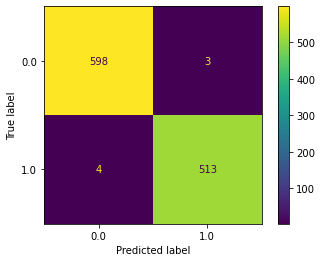

In [26]:
ConfusionMatrixDisplay.from_predictions(y_train, y_train_bow_predict)

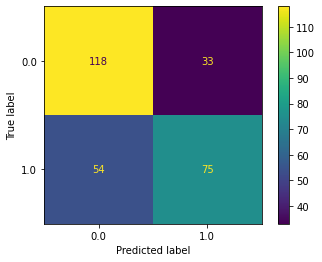

In [27]:
ConfusionMatrixDisplay.from_predictions(y_test, y_test_bow_predict)

In [28]:
print('Precision:', precision_score(y_test, y_test_bow_predict))
print('Recall:', recall_score(y_test, y_test_bow_predict))
print('F1:', f1_score(y_test, y_test_bow_predict))

Precision: 0.6944444444444444
Recall: 0.5813953488372093
F1: 0.6329113924050633


<h4 align="left"> Training and evaluating a model using TF-IDF. </h4> 

<h4>TF-IDF</h4>
                <img src="./imgs/tf-idf.png" width="400" height="40" align="left" />

In [29]:
logistic_model = LogisticRegression(random_state = 2)

In [30]:
logistic_model.fit(X_tfidf, y_train)

LogisticRegression(random_state=2)

In [31]:
y_train_tfidf_predict = logistic_model.predict(X_tfidf)
y_test_tfidf_predict = logistic_model.predict(bow.transform(X_test))

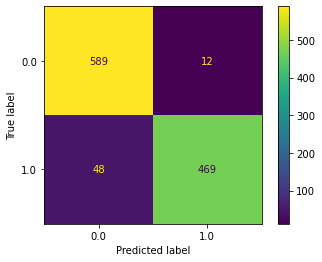

In [32]:
ConfusionMatrixDisplay.from_predictions(y_train, y_train_tfidf_predict)

In [33]:
print(y_test.head(30))

541     1.0
30      1.0
276     1.0
218     1.0
210     0.0
5540    0.0
5918    0.0
928     0.0
688     0.0
496     0.0
874     1.0
291     0.0
42      1.0
5899    1.0
778     0.0
199     0.0
4598    0.0
8       1.0
215     0.0
3083    0.0
4569    0.0
135     1.0
540     1.0
5944    1.0
181     0.0
568     1.0
355     1.0
5980    0.0
120     0.0
220     0.0
Name: sentiment, dtype: float64


In [34]:
print(y_test_tfidf_predict)

[1. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.
 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 1. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 1. 1. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0.
 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 1. 0. 0. 0.
 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


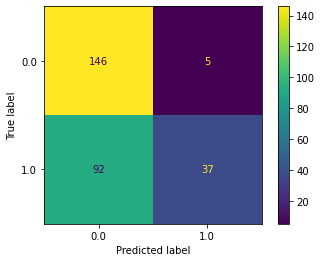

In [35]:
ConfusionMatrixDisplay.from_predictions(y_test, y_test_tfidf_predict)

In [36]:
print('Precision:', precision_score(y_test, y_test_tfidf_predict))
print('Recall:', recall_score(y_test, y_test_tfidf_predict))
print('F1:', f1_score(y_test, y_test_tfidf_predict))

Precision: 0.8809523809523809
Recall: 0.2868217054263566
F1: 0.4327485380116959
